In [1]:
%matplotlib inline


Annotate on hover
=================

When ``hover`` is set to ``True``, annotations are displayed when the mouse
hovers over the artist, without the need for clicking.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
import io
import sys
import pandas as pd
from mpldatacursor import datacursor
import matplotlib.cm as cm
import numpy as np
import string


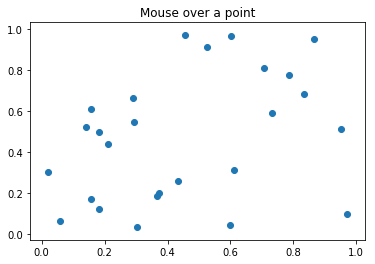

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'
np.random.seed(42)

fig, ax = plt.subplots()
ax.scatter(*np.random.random((2, 26)))
ax.set_title("Mouse over a point")

mplcursors.cursor(hover=True)


plt.show()

C:\Users\Janie228\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # Remove the CWD from sys.path while we load stuff.


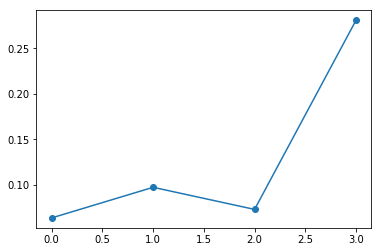

,A,B,C,D,E,F,G,H,I,J,K,KG
0,931,Oxfordshire,9314125,123255,Larkmead School,Abingdon,125,124,20.0,3.0,8,0.064000
1,931,Oxfordshire,9314126,123256,John Mason School,Abingdon,164,164,25.0,6.0,16,0.097561
2,931,Oxfordshire,9314127,123257,Fitzharrys School,Abingdon,150,149,9.0,0.0,11,0.073333
3,931,Oxfordshire,9316076,123298,Our Lady's Abingdon,Abingdon,57,57,3.0,3.0,16,0.280702


In [4]:

f = io.StringIO(
"""931,Oxfordshire,9314125,123255,Larkmead School,Abingdon,125,124,20,SUPP,8
931,Oxfordshire,9314126,123256,John Mason School,Abingdon,164,164,25,6,16
931,Oxfordshire,9314127,123257,Fitzharrys School,Abingdon,150,149,9,0,11
931,Oxfordshire,9316076,123298,Our Lady's Abingdon,Abingdon,57,57,SUPP,SUPP,16
""")
df = pd.read_csv(f, names=['A','B','C','D','E','F','G', 'H','I','J', 'K'], header=None)
df.replace('SUPP', 3.0, inplace=True)
df = df.convert_objects(convert_numeric=True)
df['KG'] = df['K']*1.0/df['G']
plt.plot(df['KG'], marker='o' )



datacursor(hover=True, point_labels=df['E'], draggable=True)
# datacursor(l, hover=True, point_labels=df['E'], formatter=lambda **kwargs: kwargs['point_label'][0])
# a white box with a fancier arrow and a different relative position
# datacursor(l, hover=True, point_labels=df['E'], bbox=dict(fc='white'), formatter=lambda **kwargs: kwargs['point_label'][0], xytext=(0, 25), arrowprops=dict(arrowstyle='simple', fc='white', alpha=0.5))

plt.show()
df

In [5]:


df = pd.DataFrame({'x':np.random.rand(10), 'y':np.random.rand(10)}, 
                  index=list(string.ascii_lowercase[:10]))
df

,x,y
a,0.939499,0.828738
b,0.894827,0.356753
c,0.597900,0.280935
d,0.921874,0.542696
e,0.088493,0.140924
f,0.195983,0.802197
g,0.045227,0.074551
h,0.325330,0.986887
i,0.388677,0.772245
j,0.271349,0.198716


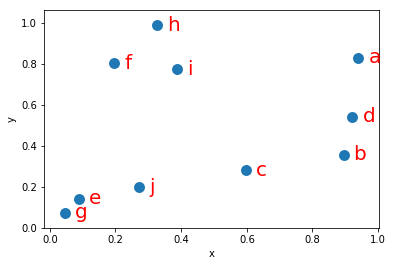

In [6]:
fig, ax = plt.subplots()
df.plot('x', 'y', kind='scatter', ax=ax,  s=120, linewidth=0,)

for k, v in df.iterrows():
    ax.annotate(k, v,size=20,  family='sans-serif', color='r',xytext=(10,-5), textcoords='offset points',)
fig.canvas.draw()

In [7]:
# ax = df.plot('x', 'y', kind='scatter', s=120, linewidth=0, c=range(len(df)))

# def annotate_df(row):  
#     ax.annotate(row.name, row.values,
#                 xytext=(10,-5), 
#                 textcoords='offset points',
#                 size=18, 
#                 color='darkslategrey')

# _ = df.apply(annotate_df, axis=1)

In [8]:
# cmap = cm.RdYlGn(np.linspace(0,1,len(df)))
# df.plot('x', 'y', kind='scatter', ax=ax, cmap=cmap, s=120, linewidth=0, c=range(len(df)))

# for k, v in df.iterrows():
#     ax.annotate(k, v,
#                 xytext=(10,-5), textcoords='offset points',
#                 family='sans-serif', fontsize=18, color='darkslategrey')

In [9]:
len(df)

10

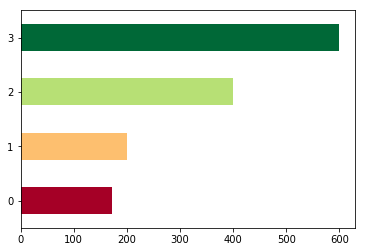

4

In [10]:
df = pd.DataFrame({'days':[172, 200, 400, 600]})
colors = cm.RdYlGn(np.linspace(0,1,len(df)))
df['days'].plot(kind='barh', color=colors)
plt.show()

len(df)

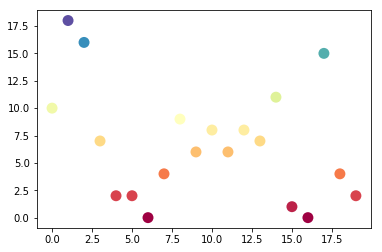

In [11]:
df = pd.DataFrame(np.random.randint(20, size=20))
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)

fig, ax = plt.subplots(1)
# Now here's the plot. range(len(df)) just makes the x values 1, 2, 3...
# df[0] is then the y values. c sets the colours (same as y values in this
# case). s is the marker size.
ax.scatter(range(len(df)), df[0], c=df[0], s=120, cmap=cmap, edgecolor='None' )
plt.show()

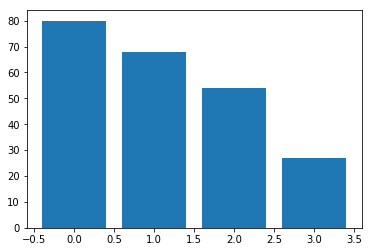

In [14]:


company=['google','amazon','msft','fb']
revenue=[80,68,54,27]

fig=plt.figure()
ax=plt.subplot()

xpos=np.arange(len(company))

bars = plt.bar(xpos,revenue)


annot = ax.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="black", ec="b", lw=2),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(bar):
    x = bar.get_x()+bar.get_width()/2.
    y = bar.get_y()+bar.get_height()
    annot.xy = (x,y)
    text = "({:.2g},{:.2g})".format( x,y )
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        for bar in bars:
            cont, ind = bar.contains(event)
            if cont:
                update_annot(bar)
                annot.set_visible(True)
                fig.canvas.draw_idle()
                return
    if not vis:
        annot.set_visible(True)
        fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()